In [1]:
###### Machine Learning Libraries ######

import numpy as np
import pandas as pd
import scipy as shc
import nltk
import spacy
import re
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, silhouette_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold, chi2, mutual_info_classif, mutual_info_regression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC, SVMSMOTE, KMeansSMOTE, BorderlineSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor, Perceptron
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, VotingClassifier, VotingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier, StackingRegressor
from xgboost import XGBClassifier, XGBRegressor

###### Deep Learning Libraries ######

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU, ELU, PReLU, Conv2D, MaxPool2D, AveragePooling2D, Flatten, LSTM, Bidirectional, Embedding
from tensorflow.keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from tensorflow.keras.activations import relu, sigmoid, softmax, swish
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy, CategoricalCrossentropy, Huber, Hinge, MSE, MAE
from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Nadam, Adamax
from tensorflow.keras.regularizers import L1, L2, L1L2
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

###### NLP Libraries ######

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

###### Download functions for nltk ######

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

###### Ignore Warning ######
import warnings
warnings.warn('my warning')
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: UserWarning: my warning


In [2]:
##### Load the dataset of TMDB movies #####
tmdb_movies_ = pd.read_csv('/content/tmdb_5000_movies.csv')
tmdb_movies_.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
##### show how many columns are presence in this dataset #####
print("# of columns in TMDB movies dataset is : ", len(tmdb_movies_.columns))

# of columns in TMDB movies dataset is :  20


In [4]:
##### print the columns name #####
for column_ in tmdb_movies_.columns:
  print(column_, end = "\n")

print("-"*100,'\n')
##### Show the Shape of this TMDB movies #####
print("# of records in this TMDB Movies dataset is : ", tmdb_movies_.shape[0],'\n')
print("# of columns in this TMDB Movies dataset is : ", tmdb_movies_.shape[1],'\n')

budget
genres
homepage
id
keywords
original_language
original_title
overview
popularity
production_companies
production_countries
release_date
revenue
runtime
spoken_languages
status
tagline
title
vote_average
vote_count
---------------------------------------------------------------------------------------------------- 

# of records in this TMDB Movies dataset is :  4803 

# of columns in this TMDB Movies dataset is :  20 



In [5]:
##### Load the dataset of TMDB credits #####
tmdb_credits_ = pd.read_csv('/content/tmdb_5000_credits.csv')
tmdb_credits_.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
##### show how many columns are presence in this dataset #####
print("# of columns in TMDB movies dataset is : ", len(tmdb_credits_.columns))

# of columns in TMDB movies dataset is :  4


In [7]:
##### print the columns name #####
for column_ in tmdb_credits_.columns:
  print(column_, end = "\n")

print("-"*100,'\n')
##### Show the Shape of this TMDB movies #####
print("# of records in this TMDB Credits dataset is : ", tmdb_credits_.shape[0],'\n')
print("# of columns in this TMDB Credits dataset is : ", tmdb_credits_.shape[1],'\n')

movie_id
title
cast
crew
---------------------------------------------------------------------------------------------------- 

# of records in this TMDB Credits dataset is :  4803 

# of columns in this TMDB Credits dataset is :  4 



In [8]:
"""
                    Here, We are seeing that both Credits and Movies Dataset has same column name\
                    "title". As a result, We can easily merge thses two dataset with this unique\
                    column. Needless to say that, we can also merge this dataset with "id", but\
                    here, "movie_id" in presence in this "Credit" dataset and "id" is present in\
                    the Movies dataset. Though, the name is different but it can be merged if we changed\
                    their name using "rename" function.

                    So, Our task is to now "MERGE" these two datasets using "title" column. Then,
                    further operations will be performed.

"""

##### Merge these two datasets #####
df = tmdb_movies_.merge(tmdb_credits_, on = 'title')

df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [9]:
##### Show the length of this dataset #####
print("# of records in this new dataset is: ", df.shape[0],'\n')
print("# of columns in this new dataset is: ", df.shape[1],'\n')

# of records in this new dataset is:  4809 

# of columns in this new dataset is:  23 



In [10]:
##### Print the column name of this dataset #####
([column_ for column_ in df.columns])

['budget',
 'genres',
 'homepage',
 'id',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'vote_average',
 'vote_count',
 'movie_id',
 'cast',
 'crew']

In [11]:
df.tagline[0]

'Enter the World of Pandora.'

In [12]:
"""
                  We should be chosen the column those will be used in further stage for building Recommendation System.

                  "budget"              - This column is not mandatory because we don't watch films based on budget.
                  "Genres"              - This is Useful column. It will tell us what kind of movie is it !
                  "homepage"            - This is not mandatory now, But when we will deploy the model in some Web then it will be used.
                  "id"                  - This should be used. because it will help us to find the movie from the dataset.
                  "keywords"            - This is useful. it will tell us what sort of this movie is !
                  "original_language"   - This is not mandatory, Does't matter when someone watches the movie. A non English Speaking viewer should be watched Hindi Movie.
                  "original_title"      - It is useful, But we will take "title" column instead of this.
                  "overview"            - It is useful because by using this we will attempt to find the similarity.
                  "popularity"          - Though it is necessary but we are not using Numeric features at all in this Recommendation System.
                  "production_compan"   - Does't matter to watch a film. 
                  "production_countries"- Does't matter to watch a film. 
                  "release_date"        - Does't matter to watch a film. 
                  "revenue"             - Does't matter to watch a film.
                  "runtime"             - Does't matter to watch a film.
                  "spoken_languages"    - Does't matter to watch a film.
                  "status"              - Does't matter to watch a film.
                  "tagline"             - Does't matter to watch a film.
                  "vote_average"        - Though it is necessary but we are not using Numeric features at all in this Recommendation System.
                  "vote_count"          - Though it is necessary but we are not using Numeric features at all in this Recommendation System.
                  "movie_id"            - It is useful, But we will take "id" column instead of this.
                  "cast"                - This is necessary beacuse we will get to know which actors worked on this films !
                  "crew"                - This is necessary beacuse we will get to know which crew worked on this films !

"""

'\n                  We should be chosen the column those will be used in further stage for building Recommendation System.\n\n                  "budget"              - This column is not mandatory because we don\'t watch films based on budget.\n                  "Genres"              - This is Useful column. It will tell us what kind of movie is it !\n                  "homepage"            - This is not mandatory now, But when we will deploy the model in some Web then it will be used.\n                  "id"                  - This should be used. because it will help us to find the movie from the dataset.\n                  "keywords"            - This is useful. it will tell us what sort of this movie is !\n                  "original_language"   - This is not mandatory, Does\'t matter when someone watches the movie. A non English Speaking viewer should be watched Hindi Movie.\n                  "original_title"      - It is useful, But we will take "title" column instead of this.\

In [13]:
##### 'id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew'  -- These columns should be used. #####
df = df.loc[:, ['id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew']]

df.head()

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [14]:
##### Now check the NaN value #####
if df.isnull().sum().sum() > 0:
  print("Yes, There is some NaN values presence in this dataset.\n")
  print(f"{df.isnull().sum()[df.isnull().sum() > 0].index.tolist()} column has NaN value = {df.isnull().sum()[df.isnull().sum() > 0].values}")
else:
  print("NaN values not presence in the dataset.")

Yes, There is some NaN values presence in this dataset.

['overview'] column has NaN value = [3]


In [15]:
##### Remove all NaN values from the dataset #####
df.dropna(inplace = True)

print("NaN values are deleted.\n")

##### Double Check about NaN values #####
if df.isnull().sum().sum() > 0:
  print("Yes, There is some NaN values presence in this dataset.\n")
  print(f"{df.isnull().sum()[df.isnull().sum() > 0].index.tolist()} column has NaN value = {df.isnull().sum()[df.isnull().sum() > 0].values}")
else:
  print("NaN values not presence in the dataset.")

NaN values are deleted.

NaN values not presence in the dataset.


In [16]:
##### Check Duplicate records in this dataset #####
if df.duplicated().sum() == 0:
  print("There is no record in this dataset where the duplicate records are present.")
else:
  print("Duplicate records are presence in the dataset.")

There is no record in this dataset where the duplicate records are present.


In [17]:
##### Show the dataset #####
df.head()

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [18]:
##### Check the genres column #####
df.loc[:, 'genres'].values[0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [19]:
"""
        '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'\
        Here, We are seeing that, It a list with Dictionary.\
        In that list, We should be extracted just "name" key. \

        BUT, there is a PROBLEM that is appeared. in this list, it's type is String. In order to Convert this, we should be used ""ast"" function\

"""

'\n        \'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]\'        Here, We are seeing that, It a list with Dictionary.        In that list, We should be extracted just "name" key. \n        BUT, there is a PROBLEM that is appeared. in this list, it\'s type is String. In order to Convert this, we should be used ""ast"" function\n'

In [20]:
###### extract Genres Function ######
def extractGenres(record_):
  extract_name_ = []
  for list_ in ast.literal_eval(record_):
    extract_name_.append(list_['name'])

  return extract_name_

df.loc[:, 'genres'] = df.loc[:, 'genres'].apply(extractGenres)

###### Show the dataset ######
df.head()

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [21]:
##### Check the keywords columns ######
df.loc[:, 'keywords'].values[0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [22]:
"""
        Here, We are seeing that, It a list with Dictionary.\
        In that list, We should be extracted just "name" key. \

        BUT, there is a PROBLEM that is appeared. in this list, it's type is String. In order to Convert this, we should be used ""ast"" function\

"""

'\n        Here, We are seeing that, It a list with Dictionary.        In that list, We should be extracted just "name" key. \n        BUT, there is a PROBLEM that is appeared. in this list, it\'s type is String. In order to Convert this, we should be used ""ast"" function\n'

In [23]:
###### extract keywords Function ######
def extractGenres(record_):
  extract_name_ = []
  for list_ in ast.literal_eval(record_):
    extract_name_.append(list_['name'])

  return extract_name_

df.loc[:, 'keywords'] = df.loc[:, 'keywords'].apply(extractGenres)

###### Show the dataset ######
df.head()

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [24]:
##### Check the keywords columns ######
df.loc[:, 'cast'].values[0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [25]:
"""
        Here, We are seeing that, It a list with Dictionary.\
        In that list, We should be extracted just "name" key.\

        BUT, there is a PROBLEM that is appeared. in this list, it's type is String. In order to Convert this, we should be used ""ast"" function\

"""

'\n        Here, We are seeing that, It a list with Dictionary.        In that list, We should be extracted just "name" key.\n        BUT, there is a PROBLEM that is appeared. in this list, it\'s type is String. In order to Convert this, we should be used ""ast"" function\n'

In [26]:
###### extract keywords Function ######
def extractCast(record_):
  extract_name_, flag_ = [], 1

  for list_ in ast.literal_eval(record_):
    if flag_ != 3:
      extract_name_.append(list_['name'])
      flag_ = flag_ + 1

  return extract_name_

df.loc[:, 'cast'] = df.loc[:, 'cast'].apply(extractCast)

###### Show the dataset ######
df.head()

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [27]:
##### Check the crew columns ######
df.loc[:, 'crew'].values[0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [28]:
"""
        Here, We are seeing that, It a list with Dictionary.\
        In that list, We should be extracted just "Director" key.\

        BUT, there is a PROBLEM that is appeared. in this list, it's type is String. In order to Convert this, we should be used ""ast"" function\

"""

'\n        Here, We are seeing that, It a list with Dictionary.        In that list, We should be extracted just "Director" key.\n        BUT, there is a PROBLEM that is appeared. in this list, it\'s type is String. In order to Convert this, we should be used ""ast"" function\n'

In [29]:
###### extract Director Function ######
def extractDirector(record_):
  extract_director_ = []
  for list_ in ast.literal_eval(record_):
    if list_['job'] == 'Director':
      extract_director_.append(list_['name'])
    else:
      pass

  return extract_director_

df.loc[:, 'crew'] = df.loc[:, 'crew'].apply(extractDirector)

###### Show the dataset ######
df.head()

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins]",[Andrew Stanton]


In [30]:
"""
In genres, keywords, cast, crew there is a problem,
For instance, "culture clash" - If We convert this Words into Vector then then this two words will be converted, but culture class is a single word here.

To solve this problem, we will remove their space and and add "_"

"""

'\nIn genres, keywords, cast, crew there is a problem,\nFor instance, "culture clash" - If We convert this Words into Vector then then this two words will be converted, but culture class is a single word here.\n\nTo solve this problem, we will remove their space and and add "_"\n\n'

In [31]:
##### For keywords we are adding "_" between space #####
df.loc[:, 'keywords'] = df.loc[:, 'keywords'].apply(lambda x: ['_'.join(word_.split()) for word_ in x])
print("keywords is done. \n")

##### For genres we are adding "_" between space #####
df.loc[:, 'genres']   = df.loc[:, 'genres'].apply(lambda x: ['_'.join(word_.split()) for word_ in x])
print("genres is done. \n")

##### For cast we are adding "_" between space #####
df.loc[:, 'cast']     = df.loc[:, 'cast'].apply(lambda x: ['_'.join(word_.split()) for word_ in x])
print("cast is done. \n")

##### For crew we are adding "_" between space #####
df.loc[:, 'crew']     = df.loc[:, 'crew'].apply(lambda x: ['_'.join(word_.split()) for word_ in x])
print("crew is done. \n")

keywords is done. 

genres is done. 

cast is done. 

crew is done. 



In [32]:
##### Show the entire dataset ######
df_ = df.copy()
df.head()

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science_Fiction]","[culture_clash, future, space_war, space_colon...","[Sam_Worthington, Zoe_Saldana]",[James_Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug_abuse, exotic_island, east_india_...","[Johnny_Depp, Orlando_Bloom]",[Gore_Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based_on_novel, secret_agent, sequel, mi...","[Daniel_Craig, Christoph_Waltz]",[Sam_Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc_comics, crime_fighter, terrorist, secret_i...","[Christian_Bale, Michael_Caine]",[Christopher_Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science_Fiction]","[based_on_novel, mars, medallion, space_travel...","[Taylor_Kitsch, Lynn_Collins]",[Andrew_Stanton]


In [33]:
##### Now split the dataset in "overview""column" #####
df.loc[:, 'overview'] = df.loc[:, 'overview'].apply(lambda x: x.split())

print("In overview - splitting is done.")

In overview - splitting is done.


In [34]:
##### Show the dataset #####
df.head()

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science_Fiction]","[culture_clash, future, space_war, space_colon...","[Sam_Worthington, Zoe_Saldana]",[James_Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug_abuse, exotic_island, east_india_...","[Johnny_Depp, Orlando_Bloom]",[Gore_Verbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based_on_novel, secret_agent, sequel, mi...","[Daniel_Craig, Christoph_Waltz]",[Sam_Mendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dc_comics, crime_fighter, terrorist, secret_i...","[Christian_Bale, Michael_Caine]",[Christopher_Nolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, Science_Fiction]","[based_on_novel, mars, medallion, space_travel...","[Taylor_Kitsch, Lynn_Collins]",[Andrew_Stanton]


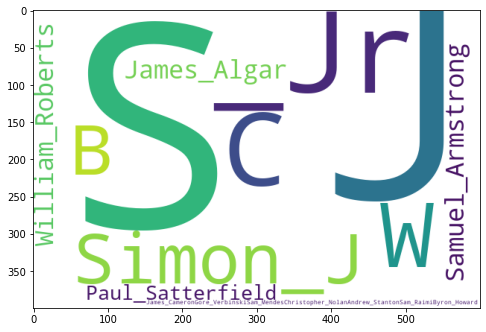

In [35]:
##### Show the frequent words in tags #####
plt.figure(figsize = (8, 8))
wordcloud_ = WordCloud(width = 600, height = 400, min_font_size = 8, background_color = 'white')
wordcloud_.generate(df_.loc[:, 'crew'].apply(lambda x: ' '.join(x)).str.cat(sep = ''))
plt.imshow(wordcloud_)
plt.show()

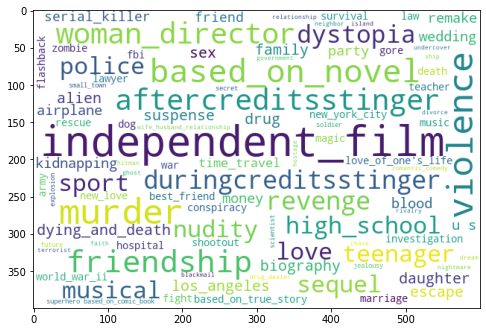

In [36]:
##### Show the frequent words in tags #####
plt.figure(figsize = (8, 8))
wordcloud_ = WordCloud(width = 600, height = 400, min_font_size = 8, background_color = 'white')
wordcloud_.generate(df_.loc[:, 'keywords'].apply(lambda x: ' '.join(x)).str.cat(sep = ''))
plt.imshow(wordcloud_)
plt.show()

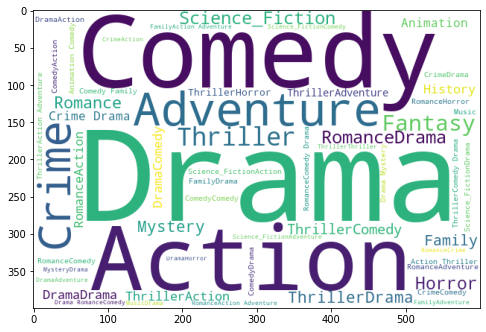

In [37]:
##### Show the frequent words in tags #####
plt.figure(figsize = (8, 8))
wordcloud_ = WordCloud(width = 600, height = 400, min_font_size = 8, background_color = 'white')
wordcloud_.generate(df_.loc[:, 'genres'].apply(lambda x: ' '.join(x)).str.cat(sep = ''))
plt.imshow(wordcloud_)
plt.show()

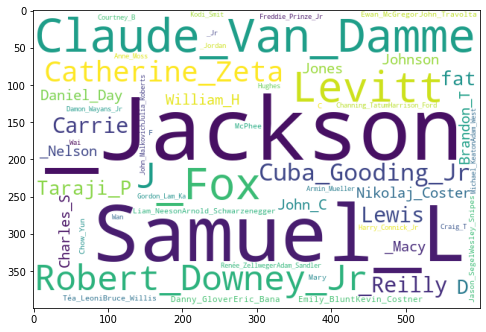

In [38]:
##### Show the frequent words in tags #####
plt.figure(figsize = (8, 8))
wordcloud_ = WordCloud(width = 600, height = 400, min_font_size = 8, background_color = 'white')
wordcloud_.generate(df_.loc[:, 'cast'].apply(lambda x: ' '.join(x)).str.cat(sep = ''))
plt.imshow(wordcloud_)
plt.show()

In [39]:
##### Merge all the dataset except "title" & "id" column #####
df['tags'] = df.loc[:, 'overview'] + df.loc[:, 'genres'] + df.loc[:, 'keywords'] + df.loc[:, 'cast'] + df.loc[:, 'crew']

df.head()

,id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science_Fiction]","[culture_clash, future, space_war, space_colon...","[Sam_Worthington, Zoe_Saldana]",[James_Cameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug_abuse, exotic_island, east_india_...","[Johnny_Depp, Orlando_Bloom]",[Gore_Verbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based_on_novel, secret_agent, sequel, mi...","[Daniel_Craig, Christoph_Waltz]",[Sam_Mendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dc_comics, crime_fighter, terrorist, secret_i...","[Christian_Bale, Michael_Caine]",[Christopher_Nolan],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, Science_Fiction]","[based_on_novel, mars, medallion, space_travel...","[Taylor_Kitsch, Lynn_Collins]",[Andrew_Stanton],"[John, Carter, is, a, war-weary,, former, mili..."


In [40]:
##### Join the tags column #####
df.loc[:, 'tags'] = df.loc[:, 'tags'].apply(lambda x: ' '.join(x))

df.head()

,id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science_Fiction]","[culture_clash, future, space_war, space_colon...","[Sam_Worthington, Zoe_Saldana]",[James_Cameron],"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug_abuse, exotic_island, east_india_...","[Johnny_Depp, Orlando_Bloom]",[Gore_Verbinski],"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based_on_novel, secret_agent, sequel, mi...","[Daniel_Craig, Christoph_Waltz]",[Sam_Mendes],A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dc_comics, crime_fighter, terrorist, secret_i...","[Christian_Bale, Michael_Caine]",[Christopher_Nolan],Following the death of District Attorney Harve...
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, Science_Fiction]","[based_on_novel, mars, medallion, space_travel...","[Taylor_Kitsch, Lynn_Collins]",[Andrew_Stanton],"John Carter is a war-weary, former military ca..."


In [41]:
##### Show only id, title, tags column #####
df = df.loc[:, ['id', 'title', 'tags']]

df.head()

,id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


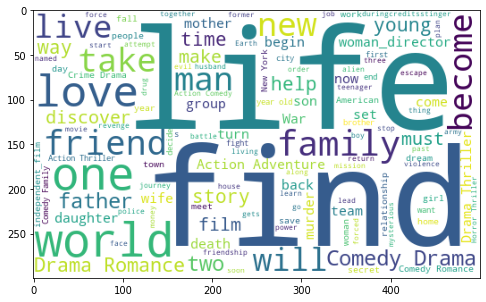

In [42]:
import wordcloud
##### Show the frequent words in tags #####
plt.figure(figsize = (8, 8))
wordcloud_ = WordCloud(width = 500, height = 300, min_font_size = 8, background_color = 'white')
wordcloud_.generate(df.loc[:, 'tags'].str.cat(sep = ''))
plt.imshow(wordcloud_)
plt.show()

In [43]:
##### Lowering the dataset #####
df.loc[:, 'tags'] = df.loc[:, 'tags'].apply(lambda x: x.lower())

df.head()

,id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


In [44]:
##### Remove all irrelevant tags #####
def removeHTML(record_):
  CLEANR = re.compile('<.*?>')
  cleantext = re.sub(re.compile('<.*?>'), ' ', record_)
  return cleantext

df.loc[:, 'tags'] = df.loc[:, 'tags'].apply(removeHTML)

df.head()

,id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


In [45]:
##### Remove all irrelevant tags #####
def removeHTML(record_):
  CLEANR = re.compile('<.*?>')
  cleantext = re.sub('[^a-zA-Z]', ' ', record_)
  return cleantext

df.loc[:, 'tags'] = df.loc[:, 'tags'].apply(removeHTML)

df.head()

,id,title,tags
0,19995,Avatar,in the nd century a paraplegic marine is di...
1,285,Pirates of the Caribbean: At World's End,captain barbossa long believed to be dead ha...
2,206647,Spectre,a cryptic message from bond s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,john carter is a war weary former military ca...


In [46]:
##### Remove the stopwords from the dataset #####
def remove_stopwords(record_):
  cleaned_text_ = []

  for word_ in word_tokenize(record_):
    if word_ in stopwords.words('english'):
      pass
    else:
      cleaned_text_.append(word_)
  
  return ' '.join(cleaned_text_)

df.loc[:, 'tags'] = df.loc[:, 'tags'].apply(remove_stopwords)

df.head()

,id,title,tags
0,19995,Avatar,nd century paraplegic marine dispatched moon p...
1,285,Pirates of the Caribbean: At World's End,captain barbossa long believed dead come back ...
2,206647,Spectre,cryptic message bond past sends trail uncover ...
3,49026,The Dark Knight Rises,following death district attorney harvey dent ...
4,49529,John Carter,john carter war weary former military captain ...


In [47]:
##### Remove all columns from the dataset #####
df.loc[:, 'tags'] = df.loc[:, 'tags'].apply(lambda x:x.replace(",", ""))

df.head()

,id,title,tags
0,19995,Avatar,nd century paraplegic marine dispatched moon p...
1,285,Pirates of the Caribbean: At World's End,captain barbossa long believed dead come back ...
2,206647,Spectre,cryptic message bond past sends trail uncover ...
3,49026,The Dark Knight Rises,following death district attorney harvey dent ...
4,49529,John Carter,john carter war weary former military captain ...


In [48]:
##### Stemming the dataset #####
porter_stemmer_ = PorterStemmer()
def stemming(record_):
  cleaned_text_ = []

  for word_ in word_tokenize(record_):
    cleaned_text_.append(porter_stemmer_.stem(word_))

  return ' '.join(cleaned_text_)

df.loc[:, 'tags'] = df.loc[:, 'tags'].apply(stemming)

df.head()

,id,title,tags
0,19995,Avatar,nd centuri parapleg marin dispatch moon pandor...
1,285,Pirates of the Caribbean: At World's End,captain barbossa long believ dead come back li...
2,206647,Spectre,cryptic messag bond past send trail uncov sini...
3,49026,The Dark Knight Rises,follow death district attorney harvey dent bat...
4,49529,John Carter,john carter war weari former militari captain ...


In [49]:
##### Remove apostrophes from a string #####
df.loc[:, 'tags'] = df.loc[:, 'tags'].apply(lambda x: x.replace("’", ""))

df.head()

,id,title,tags
0,19995,Avatar,nd centuri parapleg marin dispatch moon pandor...
1,285,Pirates of the Caribbean: At World's End,captain barbossa long believ dead come back li...
2,206647,Spectre,cryptic messag bond past send trail uncov sini...
3,49026,The Dark Knight Rises,follow death district attorney harvey dent bat...
4,49529,John Carter,john carter war weari former militari captain ...


In [50]:
##### Remove all unnecessary space #####
df.loc[:, 'tags'] = df.loc[:, 'tags'].apply(lambda x: x.strip())

df.head()

,id,title,tags
0,19995,Avatar,nd centuri parapleg marin dispatch moon pandor...
1,285,Pirates of the Caribbean: At World's End,captain barbossa long believ dead come back li...
2,206647,Spectre,cryptic messag bond past send trail uncov sini...
3,49026,The Dark Knight Rises,follow death district attorney harvey dent bat...
4,49529,John Carter,john carter war weari former militari captain ...


In [51]:
##### Find the unique words #####
tokenizer_ = Tokenizer()
tokenizer_.fit_on_texts(df.loc[:, 'tags'])
print("# of unique words in this dataset: ", len(tokenizer_.word_index),'\n')

# of unique words in this dataset:  20418 



In [52]:
##### Use Bag Of Words with Max Features = 5000 #####
BOW_     = CountVectorizer(max_features = 5000)
vectors_ = BOW_.fit_transform(df.loc[:, 'tags']).toarray()

print("The shape of this vector is: ", vectors_.shape)

The shape of this vector is:  (4806, 5000)


In [53]:
##### Find the features_name #####
BOW_.get_feature_names()

['aaron',
 'abandon',
 'abbi',
 'abduct',
 'abigail',
 'abil',
 'abl',
 'aboard',
 'aborigin',
 'abraham',
 'abroad',
 'abus',
 'academ',
 'academi',
 'accent',
 'accept',
 'access',
 'accid',
 'accident',
 'acclaim',
 'accompani',
 'accomplish',
 'account',
 'accus',
 'ace',
 'achiev',
 'acquaint',
 'across',
 'act',
 'action',
 'activ',
 'activist',
 'actor',
 'actress',
 'actual',
 'ad',
 'adam',
 'adapt',
 'add',
 'addict',
 'addit',
 'adjust',
 'admir',
 'admit',
 'adolesc',
 'adolf',
 'adopt',
 'ador',
 'adrian',
 'adrien',
 'adult',
 'adulteri',
 'adulthood',
 'advanc',
 'advantag',
 'adventur',
 'advertis',
 'advic',
 'advis',
 'affair',
 'affect',
 'affleck',
 'afghanistan',
 'africa',
 'african',
 'aftercreditssting',
 'afterlif',
 'aftermath',
 'age',
 'agenc',
 'agenda',
 'agent',
 'aggress',
 'ago',
 'agre',
 'ahead',
 'aid',
 'aidan',
 'ail',
 'aim',
 'air',
 'aircraft',
 'airplan',
 'airport',
 'aka',
 'al',
 'alabama',
 'alan',
 'alaska',
 'alba',
 'albert',
 'alcatraz'

In [54]:
##### Find the cosine Similarity #####
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity_ = cosine_similarity(vectors_)
cosine_similarity_

array([[1.        , 0.06666667, 0.06405126, ..., 0.06900656, 0.0475831 ,
        0.        ],
       [0.06666667, 1.        , 0.06004806, ..., 0.05175492, 0.        ,
        0.01644879],
       [0.06405126, 0.06004806, 1.        , ..., 0.03314968, 0.07619393,
        0.        ],
       ...,
       [0.06900656, 0.05175492, 0.03314968, ..., 1.        , 0.04925318,
        0.04086268],
       [0.0475831 , 0.        , 0.07619393, ..., 0.04925318, 1.        ,
        0.04696107],
       [0.        , 0.01644879, 0.        , ..., 0.04086268, 0.04696107,
        1.        ]])

In [55]:
##### Find the single movie that should be used for project #####
df.loc[df.loc[:, 'title'] == 'Avatar', :].index.tolist()[0]

0

In [56]:
"""
Here, 1. first of all, we should the cosine_similarity for that index
      2. Used enumerate because if we don't use then we would't find the index, because based on Index we should be finding out the ""movie_name""
      3. Here, ""key"" is used because after using "ënumerate" function it was sorted based on Index - But we should have sorted based on "cosine_similarity_",
      4. Finally, it will return a "tuple" with index and the value of "cosine_similarity_"
"""
for _ in sorted(enumerate(cosine_similarity_[0]), reverse = True, key = lambda x: x[1])[1:6]:
  print(_[0], end = "||")

2409||4336||1537||373||2021||

In [57]:
##### Sample dataset ######
df.loc[:, 'title'].sample(5)

2784            Infamous
287     Django Unchained
1264     New York Minute
2454         Wall Street
781             Inkheart
Name: title, dtype: object

In [58]:
def MovieRecommendation(movie_):
  ##### Find the index of that particular movie from the dataset #####
  index_ = df.loc[df.loc[:, 'title'] == movie_, :].index.tolist()[0]
  ##### Find the cosine Similarity and sort the list and take the top 5 movie list #####
  top_five_movie_ = sorted(enumerate(cosine_similarity_[index_]), reverse = True, key = lambda x: x[1])[1:6]
  ##### Run a loop #####
  print("Top 5 recommended movie lists in below.\n")
  print("-"*40)
  count_ = 1
  for each_index_ in top_five_movie_:
    print(count_, ': ', df.loc[each_index_[0], 'title'])
    count_ = count_ + 1

MovieRecommendation('The Dark Knight')

Top 5 recommended movie lists in below.

----------------------------------------
1 :  The Dark Knight Rises
2 :  Batman Begins
3 :  Batman
4 :  Batman
5 :  Batman & Robin
